# New Section

In [7]:
# !unzip /content/drive/MyDrive/emnist-balanced-train.csv.zip
# !unzip /content/drive/MyDrive/emnist-balanced-test.csv.zip

Archive:  /content/drive/MyDrive/emnist-balanced-train.csv.zip
replace emnist-balanced-train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/MyDrive/emnist-balanced-test.csv.zip
  inflating: emnist-balanced-test.csv  


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("/content/drive/MyDrive/NMAI/emnist-balanced-train.csv").astype('float32')
data_test = pd.read_csv("/content/drive/MyDrive/NMAI/emnist-balanced-test.csv").astype('float32')

In [3]:
data_train['45']

0         36.0
1         43.0
2         15.0
3          4.0
4         42.0
          ... 
112794    22.0
112795    17.0
112796    23.0
112797    31.0
112798     8.0
Name: 45, Length: 112799, dtype: float32

In [6]:
data_train.rename(columns={'45':'label'}, inplace=True)
data_test.rename(columns={'41':'label'}, inplace=True)

In [7]:
X_train = data_train.drop('label',axis = 1)
y_train = data_train['label']

X_test = data_test.drop('label',axis = 1)
y_test = data_test['label']

In [8]:
label_map = pd.read_csv("/content/drive/MyDrive/NMAI/mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)

In [9]:
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

In [ ]:
label_dictionary

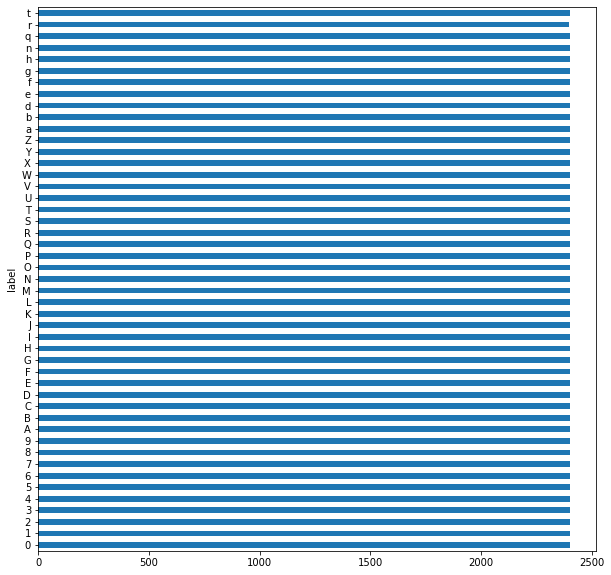

In [10]:
data_train['label'] = data_train['label'].map(label_dictionary)
label_size = data_train.groupby('label').size()
label_size.plot.barh(figsize=(10,10))

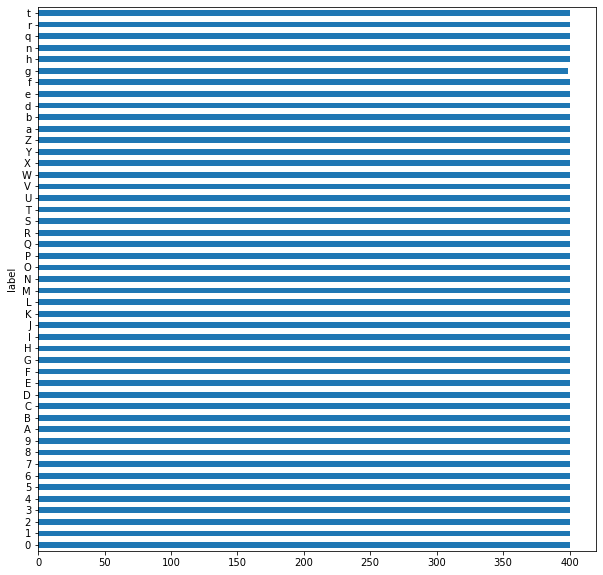

In [11]:
data_test['label'] = data_test['label'].map(label_dictionary)
label_size = data_test.groupby('label').size()
label_size.plot.barh(figsize=(10,10))

In [12]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Y_train = np_utils.to_categorical([int(x) for x in y_train], 47)
Y_test = np_utils.to_categorical([int(x) for x in y_test], 47)

In [41]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,padding='same',activation= 'relu',
                     input_shape=(28,28,1)))
# model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,padding='same',activation= 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=3,padding='same',activation= 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
# model.add(Conv2D(256,kernel_size=3,padding='same',activation= 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(units = 47, activation = 'softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
H = model.fit(X_train, Y_train, validation_split=0.1, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
3173/3173 [==============================] - 1441s 454ms/step - loss: 2.0832 - accuracy: 0.4507 - val_loss: 0.6831 - val_accuracy: 0.7758
Epoch 2/10
3173/3173 [==============================] - 1433s 452ms/step - loss: 0.7801 - accuracy: 0.7473 - val_loss: 0.4672 - val_accuracy: 0.8407
Epoch 3/10
3173/3173 [==============================] - 1436s 453ms/step - loss: 0.5418 - accuracy: 0.8183 - val_loss: 0.4183 - val_accuracy: 0.8521
Epoch 4/10
3173/3173 [==============================] - 1436s 452ms/step - loss: 0.4513 - accuracy: 0.8441 - val_loss: 0.3991 - val_accuracy: 0.8589
Epoch 5/10
1241/3173 [==========>...................] - ETA: 14:11 - loss: 0.3917 - accuracy: 0.8634

In [39]:
model.save('model3_no_maxpooling.h5')
model.save_weights('weight3_no_maxpooling.h5')
np.save('history_no_maxpooling.npy',H.history)

In [35]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(1,len(acc)+1)

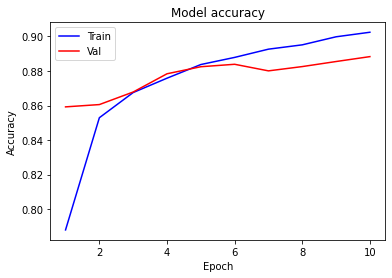

In [40]:
plotgraph(epochs, acc, val_acc)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)